Importing necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Titanic Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Basic EDA

In [4]:
df.shape

(891, 12)

The data has 891 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 2 float columns ,5 integer columns and 4 string/object based column

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<br>with 891 rows, 'Cabin' column has more than 75% null values i.e., 687 null values<br>

But before any manipulation in data ,it is recommended to make a copy and do the work upon the copy

In [8]:
df1=df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for duplicates 

In [9]:
df.duplicated().sum()

0

In [10]:
df1['PassengerId'].nunique()

891

In [11]:
df1['Name'].nunique()

891

In [12]:
df1['Ticket'].nunique()

681

We will be dropping the 'Cabin' column as it has more than 75% of null values
We will also be dropping 'Passengerid' and 'Name' columns as it has all unique values which is irrelevant for machine learning model building

In [13]:
df1.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Let us fill all the null values

In [14]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

'Embarked' is a categorical column so,we will be using mode to fill the null values 
'Age' is a numerical column so,we will be using mean to fill the null values

In [15]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
df1['Embarked'].fillna(df1['Embarked'].mode,inplace=True)
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64


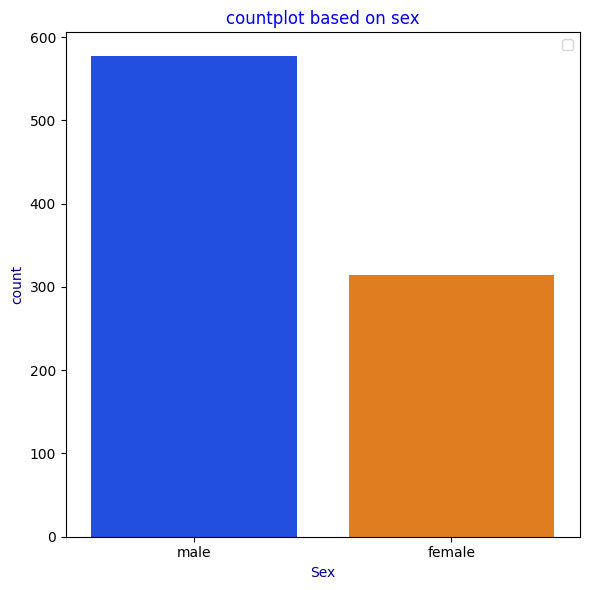

In [17]:
print(df1['Sex'].value_counts())
plt.figure(figsize=(6,6))
sns.countplot(data=df1,x='Sex',palette='bright')
plt.xlabel('Sex',color='darkblue')
plt.ylabel('count',color='darkblue')
plt.title('countplot based on sex',color='blue')
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Check for duplicated values

In [19]:
df1.duplicated().sum()

15

In [20]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['Sex']=lb.fit_transform(df1['Sex'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [22]:
df1['Ticket']=lb.fit_transform(df1['Ticket'])
#df1['Embarked']=lb.fit_transform(df1['Embarked'])

In [23]:
df1['Embarked']=df1['Embarked'].astype('str')

In [24]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB


In [25]:
df1['Embarked']=lb.fit_transform(df1['Embarked'])

In [26]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,3
1,1,1,0,38.0,1,0,596,71.2833,1
2,1,3,0,26.0,0,0,669,7.9250,3
3,1,1,0,35.0,1,0,49,53.1000,3
4,0,3,1,35.0,0,0,472,8.0500,3


Now we have to scale the data


In [27]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
df1_scaled=mmsc.fit_transform(df1)
df1_scaled

array([[0.        , 1.        , 1.        , ..., 0.76911765, 0.01415106,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.87647059, 0.13913574,
        0.33333333],
       [1.        , 1.        , 0.        , ..., 0.98382353, 0.01546857,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.99264706, 0.04577135,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.01176471, 0.0585561 ,
        0.33333333],
       [0.        , 1.        , 1.        , ..., 0.68529412, 0.01512699,
        0.66666667]])

In [29]:
df2=pd.DataFrame(df1_scaled,columns=df1.columns)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.769118,0.014151,1.000000
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.876471,0.139136,0.333333
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.983824,0.015469,1.000000
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.072059,0.103644,1.000000
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.694118,0.015713,1.000000


Selecting independent and dependent features

In [30]:
x=df2.drop('Survived',axis=1)
y=df2['Survived']


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


Creating functions to evaluate Confusion matrix,classification report and accuracy score 

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def cls_eval(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('Accuracy Score=',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
def mscore(model):
    print('Training Score=',model.score(x_train,y_train))
    print('Training Score=',model.score(x_test,y_test))
    

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models=[KNeighborsClassifier(n_neighbors=5),LogisticRegression(max_iter=1000,solver='liblinear'),DecisionTreeClassifier(criterion='gini'),RandomForestClassifier(n_estimators=5,criterion='gini')]
for i in models:
    print(i)
    mod=i
    i.fit(x_train,y_train)
    mscore(i)
    y_pred= i.predict(x_test)
    cls_eval(y_test,y_pred)
    print()

KNeighborsClassifier()
Training Score= 0.8525280898876404
Training Score= 0.7653631284916201
[[86 19]
 [23 51]]
Accuracy Score= 0.7653631284916201
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       105
         1.0       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179


LogisticRegression(max_iter=1000, solver='liblinear')
Training Score= 0.7991573033707865
Training Score= 0.7932960893854749
[[90 15]
 [22 52]]
Accuracy Score= 0.7932960893854749
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       105
         1.0       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


DecisionTreeClassif

Random forest is the best model for the data